In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ds = pd.read_csv('data.csv')


In [27]:
ds[ds['Categoria'] == 'Obstetrico']

,Unnamed: 0,Competência,Ano,Mes,Código,Categoria,Descrição,Existente,SUS,%Ocupação,Geocodigo,População,País,Estado,Município,Mesoregião,Regional de Saúde
170,170,2016-01-20,2016,1,10,Obstetrico,OBSTETRICIA CIRURGICA,3,3,1.0,220020,17224,Brasil,PI,Água Branca,Centro-Norte Piauiense,Entre Rios
171,171,2016-01-20,2016,1,43,Obstetrico,OBSTETRICIA CLINICA,5,5,1.0,220020,17224,Brasil,PI,Água Branca,Centro-Norte Piauiense,Entre Rios
176,176,2016-02-20,2016,2,10,Obstetrico,OBSTETRICIA CIRURGICA,3,3,1.0,220020,17224,Brasil,PI,Água Branca,Centro-Norte Piauiense,Entre Rios
177,177,2016-02-20,2016,2,43,Obstetrico,OBSTETRICIA CLINICA,5,5,1.0,220020,17224,Brasil,PI,Água Branca,Centro-Norte Piauiense,Entre Rios
182,182,2016-03-20,2016,3,10,Obstetrico,OBSTETRICIA CIRURGICA,3,3,1.0,220020,17224,Brasil,PI,Água Branca,Centro-Norte Piauiense,Entre Rios
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48554,48554,2022-08-20 00:00:00,2022,8,10,Obstetrico,OBSTETRICIA CIRURGICA,4,4,1.0,221170,4479,Brasil,PI,Wall Ferraz,Sudeste Piauiense,Vale Do Rio Guaribas
48558,48558,2022-09-20 00:00:00,2022,9,10,Obstetrico,OBSTETRICIA CIRURGICA,4,4,1.0,221170,4479,Brasil,PI,Wall Ferraz,Sudeste Piauiense,Vale Do Rio Guaribas
48562,48562,2022-10-20 00:00:00,2022,10,10,Obstetrico,OBSTETRICIA CIRURGICA,4,4,1.0,221170,4479,Brasil,PI,Wall Ferraz,Sudeste Piauiense,Vale Do Rio Guaribas
48566,48566,2022-11-20 00:00:00,2022,11,10,Obstetrico,OBSTETRICIA CIRURGICA,4,4,1.0,221170,4479,Brasil,PI,Wall Ferraz,Sudeste Piauiense,Vale Do Rio Guaribas


In [17]:
ds['Ano']

0        2016
1        2016
2        2016
3        2016
4        2016
         ... 
48567    2022
48568    2022
48569    2022
48570    2022
48571    2022
Name: Ano, Length: 48572, dtype: int64

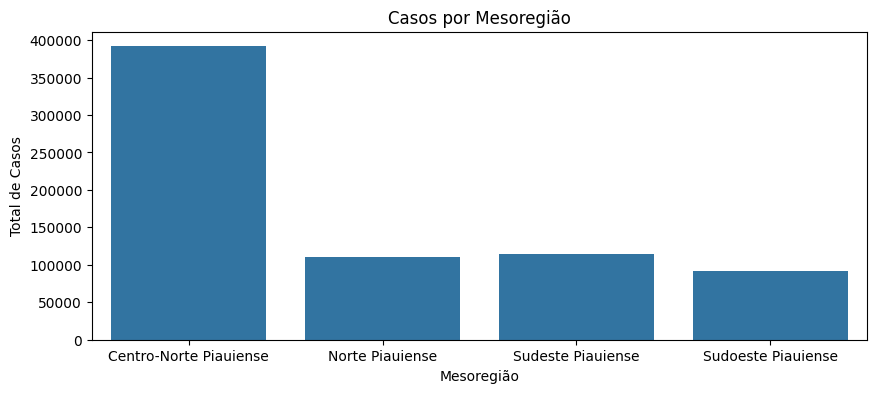

In [16]:
# Agrupando dados por Mesoregião e calculando a soma dos casos
grouped_data = ds.groupby('Mesoregião')['Existente'].sum().reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(x='Mesoregião', y='Existente', data=grouped_data)
plt.title('Casos por Mesoregião')
plt.xlabel('Mesoregião')
plt.ylabel('Total de Casos')
plt.show()

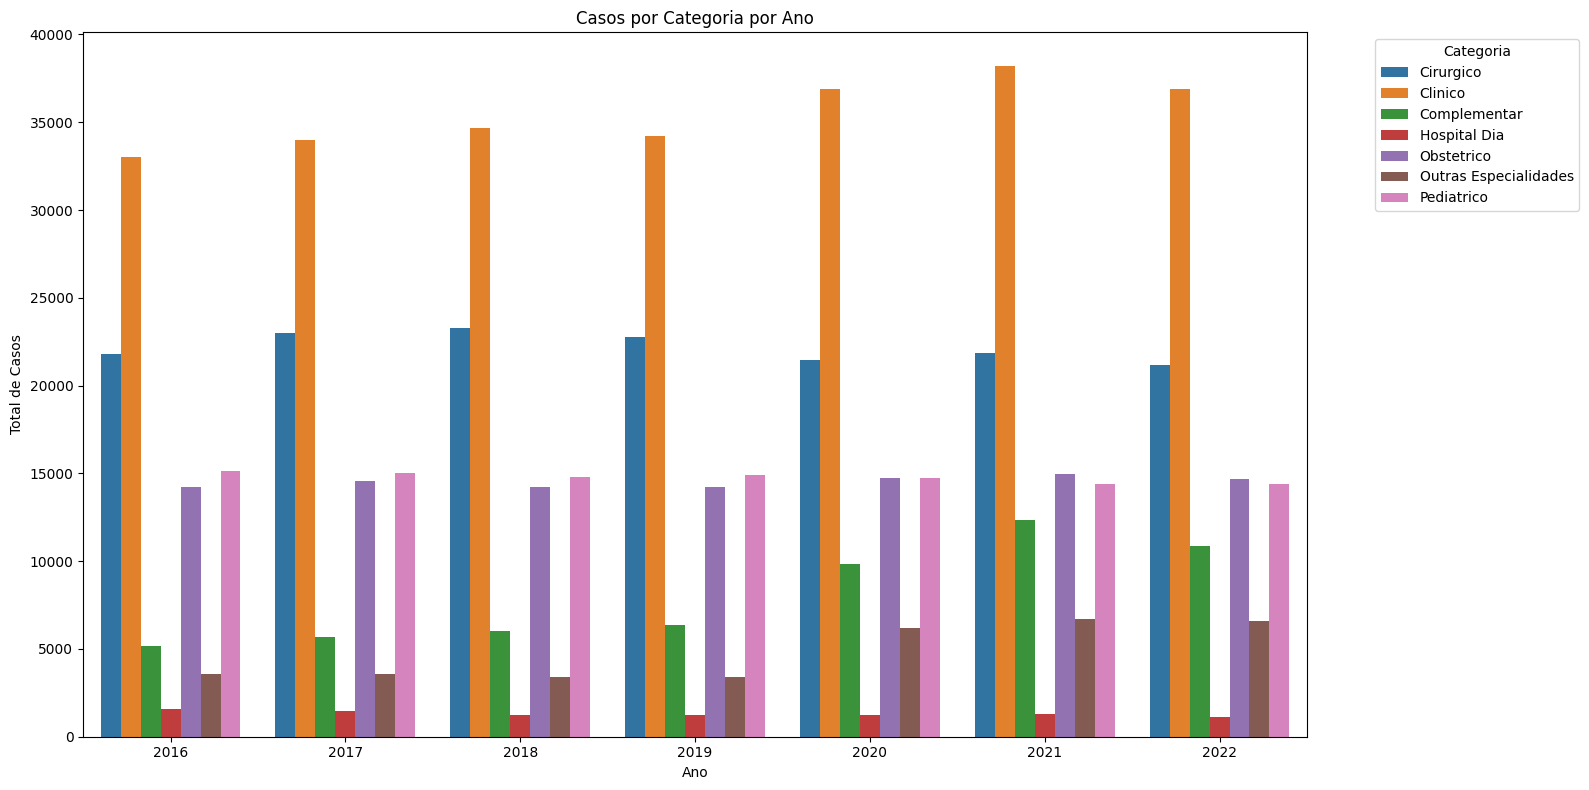

In [20]:
# Agrupando os dados por Categoria e Ano, e calculando a soma dos casos
grouped_data = ds.groupby(['Categoria', 'Ano'])['Existente'].sum().reset_index()

# Criando o gráfico de barras
plt.figure(figsize=(16, 8))
sns.barplot(x='Ano', y='Existente', hue='Categoria', data=grouped_data)
plt.title('Casos por Categoria por Ano')
plt.xlabel('Ano')
plt.ylabel('Total de Casos')
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



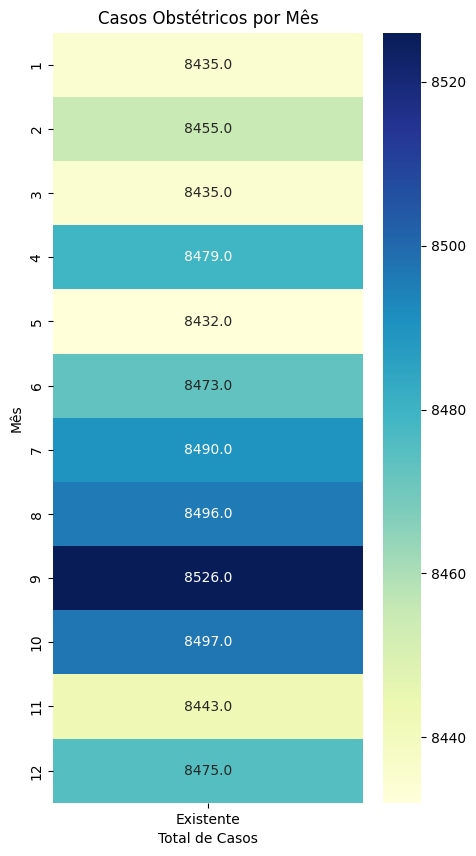

In [33]:
# Filtrando o DataFrame para incluir apenas a categoria 'Obstetrico'
filtered_data = ds[ds['Categoria'] == 'Obstetrico']

# Agrupando os dados filtrados por Mês e calculando a soma dos casos
heatmap_data = pd.DataFrame(grouped_data['Existente'].values.reshape(-1, 1), index=grouped_data['Mes'], columns=['Existente'])


# Criando o mapa de calor
plt.figure(figsize=(5, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Casos Obstétricos por Mês')
plt.xlabel('Total de Casos')
plt.ylabel('Mês')
plt.show()


